# Setting up Data and Packages

## Import necessary packages

In [ ]:
import os, re, math

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import cv2
import tensorflow as tf

## Download data
The first step is to download the training data and the test data


In [ ]:
from google.colab import drive, files

drive.mount("/content/gdrive", force_remount=True)
!ls '/content/gdrive/My Drive/datasets'

Mounted at /content/gdrive
6min_scnn_labeled.mp4  drive_data.csv


Altneratively, mount the Google Drive

## Loading the CSV Files

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/datasets/drive_data.csv")
df = df.iloc[::3, :] # keeping only results from every 3rd index
print(len(df))
df.head()
# df_val = pd.read_csv("data/val/val.csv")
# df_test = pd.read_csv("data/test/test.csv")

12133


,idx,speed,angle
0,0,25.0,0.0
3,3,25.0,0.0
6,6,25.0,0.0
9,9,25.0,0.0
12,12,25.0,0.0


In [ ]:
# to split csv file into training and validation sets (80:20)
df_val = df.iloc[:(len(df)//4), :]
print(len(df_val))
df_train = df.iloc[(len(df)//4):, :]
print(len(df_train))
df_train.head()

3033
9100


,idx,speed,angle
9099,9099,45.0,0.0
9102,9102,45.0,0.0
9105,9105,45.0,0.0
9108,9108,45.0,0.0
9111,9111,45.0,0.0


In [ ]:
# define variables used
frame_count = 0
time_increment = 30 # taking at every index
frame_increment = time_increment / 30

# vid = cv2.VideoCapture('/content/gdrive/My Drive/datasets/outpy_train.mp4')
vid = cv2.VideoCapture('/content/gdrive/My Drive/datasets/6min_scnn_labeled.mp4')
success, image = vid.read()

while success and frame_count < len(df):
  if frame_count % frame_increment == 0:

    cv2.imwrite("frame%d_raw_1.png" % frame_count, image)

  success, image = vid.read()
  if frame_count % 100 == 0:
      print("Count: ", frame_count)
  frame_count += 1

Count:  0
Count:  100
Count:  200
Count:  300
Count:  400
Count:  500
Count:  600
Count:  700
Count:  800
Count:  900
Count:  1000
Count:  1100
Count:  1200
Count:  1300
Count:  1400
Count:  1500
Count:  1600
Count:  1700
Count:  1800
Count:  1900
Count:  2000
Count:  2100
Count:  2200
Count:  2300
Count:  2400
Count:  2500
Count:  2600
Count:  2700
Count:  2800
Count:  2900
Count:  3000
Count:  3100
Count:  3200
Count:  3300
Count:  3400
Count:  3500
Count:  3600
Count:  3700
Count:  3800
Count:  3900
Count:  4000
Count:  4100
Count:  4200
Count:  4300
Count:  4400
Count:  4500
Count:  4600
Count:  4700
Count:  4800
Count:  4900
Count:  5000
Count:  5100
Count:  5200
Count:  5300
Count:  5400
Count:  5500
Count:  5600
Count:  5700
Count:  5800
Count:  5900
Count:  6000
Count:  6100
Count:  6200
Count:  6300
Count:  6400
Count:  6500
Count:  6600
Count:  6700
Count:  6800
Count:  6900
Count:  7000
Count:  7100
Count:  7200
Count:  7300
Count:  7400
Count:  7500
Count:  7600
Count:  770

# Exploratory Data Analysis
We now see the kind of images the dataset contains to get a better idea.

## First look at the Originals

0 0.0 0


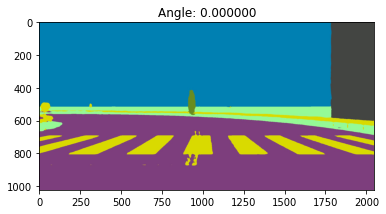

In [ ]:
Y_SIZE, X_SIZE = 4, 6
ROWS, COLS = 1, 1
fig, ax = plt.subplots(ROWS, COLS, figsize=(COLS * X_SIZE, ROWS * Y_SIZE))
ax = np.reshape(ax, (-1,))
i = 0
for idx, data in df_val.head(ROWS).iterrows():
    filename, label = i, data['angle']
    print(filename, label, idx)
    image = plt.imread("/content/frame%d_raw_1.png"%(filename))
    width, height, RGB_channels = image.shape
    # print(width, height, RGB_channels)

    ax[int(idx/3)].imshow(image)
    ax[int(idx/3)].set_title('Angle: %f'%(label))
    # ax[int(idx/3)].set_title('Index: %f'%(filename))
    i += 1
  
# j = len(df_val) # starting point is where training data ends
# for idx, data in df_train.head(ROWS).iterrows():
#     filename, label = j, data['angle']
#     print(filename, label, idx)
#     image = plt.imread("/content/frame%d_raw_1.png"%(filename))
    
#     ax[int(idx/j)].imshow(image)
#     ax[int(idx/j)].set_title('Angle: %f'%(label))
#     # ax[int(idx/j)].set_title('Index: %f'%(filename))
#     j += 3

## Trying some filters on

0 0.0 0
949 2048
1 0.0 3
949 2048
3033 0.0 9099
3036 0.0 9102


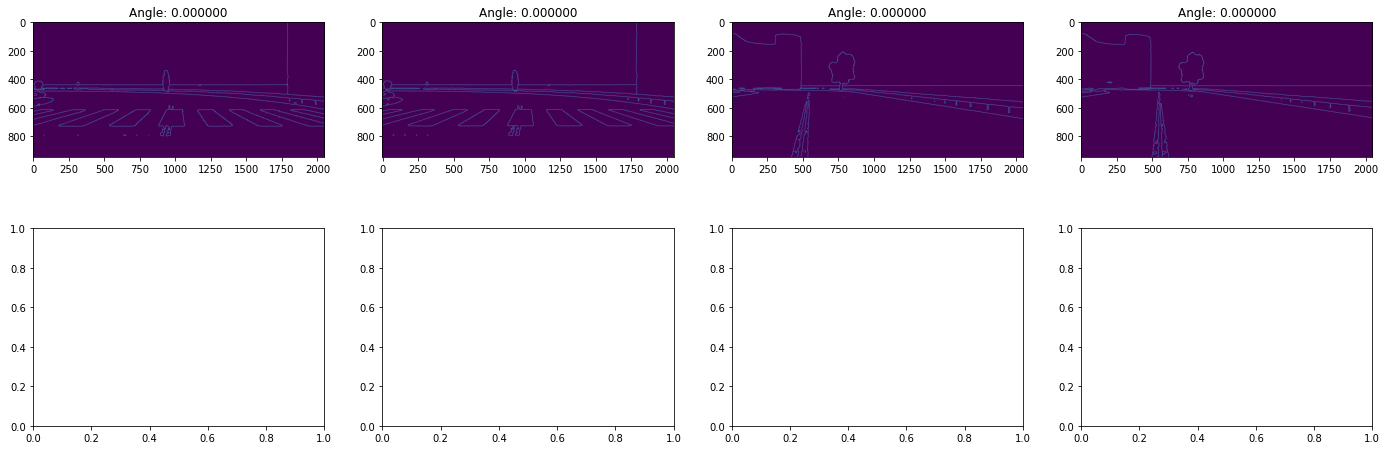

In [ ]:
def transform(image):
    return cv2.Canny(image[75:, :], 100, 200)

Y_SIZE, X_SIZE = 4, 6
ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(COLS * X_SIZE, ROWS * Y_SIZE))
ax = np.reshape(ax, (-1,))
i = 0
for idx, data in df_val.head(ROWS).iterrows():
    filename, label = i, data['angle']
    print(filename, label, idx)
    image = transform((plt.imread("/content/frame%d_raw_1.png"%(filename))*255).astype(np.uint8))
    width, height = image.shape # no more RGB channels
    print(width, height)
    ax[int(idx/3)].imshow(image)
    ax[int(idx/3)].set_title('Angle: %f'%(label))
    # ax[int(idx/3)].set_title('Index: %f'%(filename))
    i += 1
  
j = len(df_val) # starting point is where training data ends
for idx, data in df_train.head(ROWS).iterrows():
    filename, label = j, data['angle']
    print(filename, label, idx)
    image = transform((plt.imread("/content/frame%d_raw_1.png"%(filename))*255).astype(np.uint8))
    
    ax[int(idx/j)].imshow(image)
    ax[int(idx/j)].set_title('Angle: %f'%(label))
    # ax[int(idx/j)].set_title('Index: %f'%(filename))
    j += 3

## Plot the Steering Angle Distribution

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


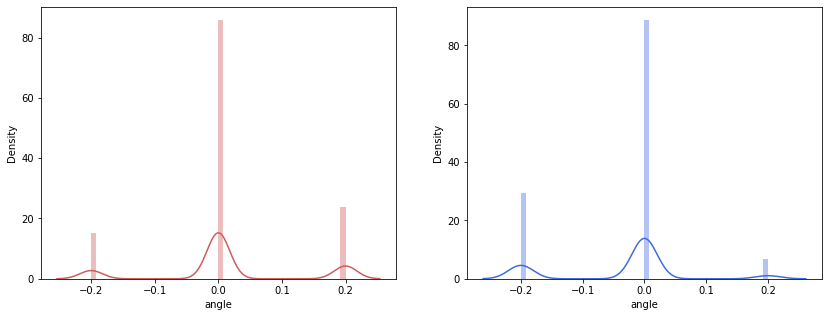

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.distplot(df_train.angle, ax=ax[0], color='IndianRed')
sns.distplot(df_val.angle, ax=ax[1], color='RoyalBlue')
plt.show()

# TFRecord Generation

## Hyperparameter Setup

In [ ]:
BATCH_SIZE = 4 #@param {type:"number"}
IMAGE_SIZE = 224 #@param {type:"number"}
iMAGE_WIDTH = 1024 #@param {type:"number"}
IMAGE_HEIGHT = 2048 #@param {type:"number"}
RGB_CHANNELS = 3 #@param {type:"number"}

## Load Data
We use PIL library to load our images. Here we are creating our array where our input features are the mean colours and output features are the rotations along the x axis.

In [ ]:
print('Number of rows in train:', len(df_train))
print('Number of rows in val:', len(df_val))
# print('Number of rows in test:', len(df_test))

Number of rows in train: 9100
Number of rows in val: 3033


In [ ]:
def get_image(filename):
    # image = transform((plt.imread("/content/frame%d_raw_1.png"%(filename))*255).astype(np.uint8))
    # image = transform(cv2.imread('/content/frame%d_raw_1.png'%(filename)))
    image = cv2.imread('/content/frame%d_raw_1.png'%(filename))
    # image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    return cv2.imencode('.jpg', image, (cv2.IMWRITE_JPEG_QUALITY, 100))[1].tostring()

def get_label(value):
    return value

def round_sig(x, sig):
    return round(x, sig-int(math.floor(math.log10(abs(x))))-1)

In [ ]:
# validation set
RECORD_SIZE = 2000
RECORD_COUNT = (len(df_val) + RECORD_SIZE - 1) // RECORD_SIZE
print(RECORD_COUNT)

for j in range(RECORD_COUNT):
    print('Writing Record %i of %i...' % (j + 1, RECORD_COUNT), end=' ')
    CURRENT_RECORD_SIZE = min(RECORD_SIZE, len(df_val) - j * RECORD_SIZE)
    print(CURRENT_RECORD_SIZE, len(df_val))
    with tf.io.TFRecordWriter('autodri_val_%d.tfrec'%(j)) as writer:
        for k in range(CURRENT_RECORD_SIZE):
            index = j * RECORD_SIZE + k
            filename = int(df_val.iloc[index]['idx']/3) # shifting index to /3
            # print(filename)
            # filename = "frame%d_raw_1.png"%(df_val.iloc[j * RECORD_SIZE + k])
            angle = df_val.iloc[index]['angle']
            feature = {
                # image = plt.imread("/content/frame%d_raw_1.png"%(filename))
                'image': tf.train.Feature(bytes_list=tf.train.BytesList(value=[get_image(filename)])),
                'angle': tf.train.Feature(float_list=tf.train.FloatList(value=[get_label(angle)]))
            }
            example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
            writer.write(example_proto.SerializeToString())
            if (k % 100 == 0): print(k // 100, end=' ')
    print()

2
Writing Record 1 of 2... 2000 3033
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
Writing Record 2 of 2... 1033 3033
0 1 2 3 4 5 6 7 8 9 10 


In [ ]:
# training set
RECORD_SIZE = 2000
RECORD_COUNT = (len(df_train) + RECORD_SIZE - 1) // RECORD_SIZE
print(RECORD_COUNT)

for j in range(RECORD_COUNT):
    print('Writing Record %i of %i...' % (j + 1, RECORD_COUNT), end=' ')
    CURRENT_RECORD_SIZE = round_sig(min(RECORD_SIZE, len(df_train) - j * RECORD_SIZE), 2)
    # CURRENT_RECORD_SIZE = min(RECORD_SIZE, len(df_train) - j * RECORD_SIZE)
    print(CURRENT_RECORD_SIZE, len(df_train))
    with tf.io.TFRecordWriter('autodri_train_%d.tfrec'%(j)) as writer:
        for k in range(CURRENT_RECORD_SIZE):
            index = j * RECORD_SIZE + k
            filename = int(df_train.iloc[index]['idx']/3) # shifting index to /3
            # print(filename)
            # filename = "frame%d_raw_1.png"%(df_train.iloc[j * RECORD_SIZE + k])
            angle = df_train.iloc[index]['angle']
            feature = {
                # image = plt.imread("/content/frame%d_raw_1.png"%(filename))
                'image': tf.train.Feature(bytes_list=tf.train.BytesList(value=[get_image(filename)])),
                'angle': tf.train.Feature(float_list=tf.train.FloatList(value=[get_label(angle)]))
            }
            example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
            writer.write(example_proto.SerializeToString())
            if (k % 100 == 0): print(k // 100, end=' ')
    print()

5
Writing Record 1 of 5... 2000 9100
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 


In [ ]:
if os.path.exists('tfrec'):
  !rm -rf tfrec

In [ ]:
if not os.path.exists('tfrec'):
    os.mkdir('tfrec')
    os.mkdir('tfrec/train')
    os.mkdir('tfrec/val')
    # os.mkdir('tfrec/test')
    for filename in os.listdir():
        if 'autodri_train' in filename:
            os.rename(filename, 'tfrec/train/' + filename)
        if 'autodri_val' in filename:
            os.rename(filename, 'tfrec/val/' + filename)
        # if 'autodri_test' in filename:
        #     os.rename(filename, 'tfrec/test/' + filename)

## Reading the TFRecords

In [ ]:
def read_tfrecord(example):
    tfrec_format = {
        'image': tf.io.FixedLenFeature([], tf.string),
        'angle': tf.io.FixedLenFeature([], tf.float32),
    }
    example = tf.io.parse_single_example(example, tfrec_format)
    return example['image'], example['angle']

def prepare_image(img):
    img = tf.image.resize(tf.image.decode_jpeg(img, channels=3), (IMAGE_SIZE, IMAGE_SIZE))
    img = tf.cast(img, tf.float32) / 255.0
    return img

def get_dataset(files, repeat = False, train = True):
    ds = tf.data.TFRecordDataset(files, num_parallel_reads=tf.data.experimental.AUTOTUNE)
    ds = ds.cache()
    if repeat: ds = ds.repeat()
    ds = ds.map(read_tfrecord, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    ds = ds.map(lambda image, label: tuple(
      [tuple([prepare_image(image)]), label]), 
      num_parallel_calls=tf.data.experimental.AUTOTUNE)
    ds = ds.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
    return ds

## Looking at the TF-Record images

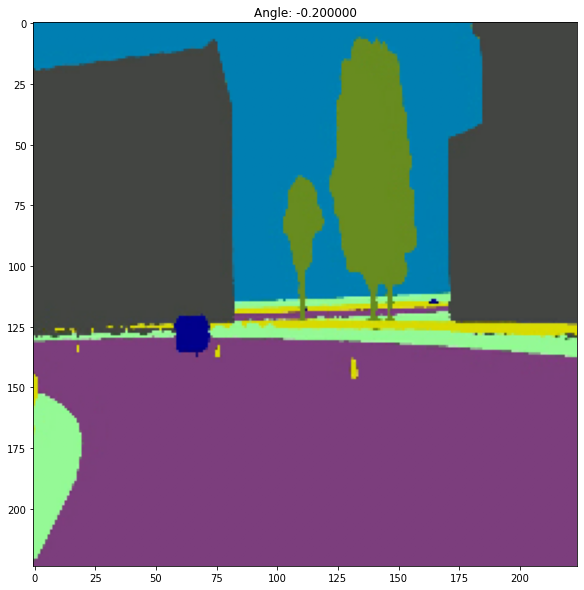

In [ ]:
THUMBNAIL_SIZE = 10
ROWS, COLS = 1, 1

ds = get_dataset(['tfrec/train/' + filename for filename in os.listdir('tfrec/train/')]).unbatch().take(ROWS)
fig, ax = plt.subplots(ROWS, COLS, figsize=(COLS * THUMBNAIL_SIZE, ROWS * THUMBNAIL_SIZE))
ax = np.reshape(ax, (-1,))
for idx, data in enumerate(iter(ds)):
    images, label = data
    image = images
    # print(image, label)
    label = 'Angle: %f'%(label.numpy())
    ax[idx].imshow(image[0])
    ax[idx].set_title(label)

# Models and Predictions

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


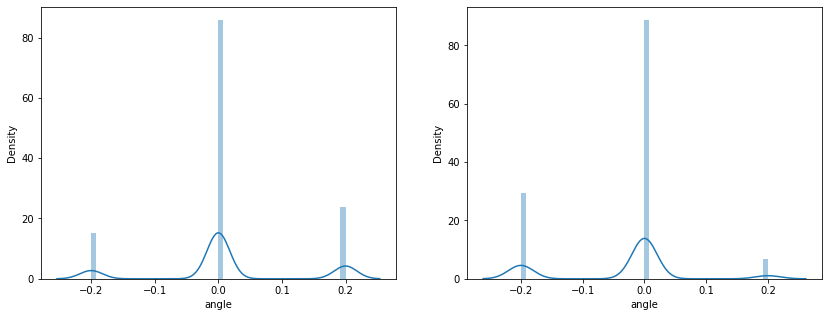

In [ ]:
fix, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.distplot(df_train['angle'].apply(get_label), ax=ax[0])
sns.distplot(df_val['angle'].apply(get_label), ax=ax[1])
plt.show()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb5 (Functional)  (None, 7, 7, 2048)        28513527  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               204900    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
output (Dense)               (None, 1)                

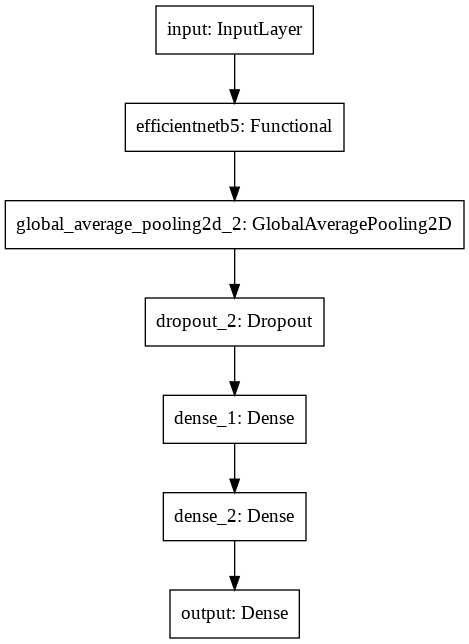

In [ ]:
def get_model():
    image = tf.keras.layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3), name='input')
    network = tf.keras.applications.EfficientNetB5(include_top=False, weights='imagenet', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    steer = network(image)
    steer = tf.keras.layers.GlobalAveragePooling2D()(steer)
    steer = tf.keras.layers.Dropout(0.5)(steer)
    steer = tf.keras.layers.Dense(100, activation='relu', name='dense_1')(steer)
    steer = tf.keras.layers.Dense(10, activation='relu', name='dense_2')(steer)
    steer = tf.keras.layers.Dense(1, name='output')(steer)
    return tf.keras.models.Model(inputs=[image], outputs=[steer])

model = get_model()
model.summary()
tf.keras.utils.plot_model(model)

In [ ]:
train_dataset = get_dataset(['tfrec/train/' + filename for filename in os.listdir('tfrec/train/')])
val_dataset = get_dataset(['tfrec/val/' + filename for filename in os.listdir('tfrec/val/')])
PROJECT_DIR = '/content/'
mc = tf.keras.callbacks.ModelCheckpoint(PROJECT_DIR + 'check_all4ori', monitor='val_loss', mode='min', save_best_only=True, save_weights_only=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.1, verbose=1)

model.compile(
    # loss=tf.keras.losses.Huber(name='loss_huber'), 
    loss = tf.keras.losses.MeanSquaredLogarithmicError(reduction="auto", name="mean_squared_logarithmic_error"),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.KLDivergence(name='metric_kl'),
        tf.keras.metrics.LogCoshError(name='metric_cosh'),
        tf.keras.metrics.MeanAbsoluteError(name='metric_mae'),
        tf.keras.metrics.MeanSquaredError(name='metric_mse'),
        tf.keras.metrics.MeanSquaredLogarithmicError(name='mean_squared_logarithmic_error'),
    ]
)

In [ ]:
model.fit(
    train_dataset,
    epochs=10, 
    validation_data=val_dataset, 
    callbacks=[lr, mc]
)

Epoch 1/10
2267/2267 [==============================] - 393s 174ms/step - loss: 0.0064 - metric_kl: 0.5559 - metric_cosh: 1.3592 - metric_mae: 1.9976 - metric_mse: 4.4911 - mean_squared_logarithmic_error: 0.0064 - val_loss: 0.0018 - val_metric_kl: 0.1588 - val_metric_cosh: 1.8549 - val_metric_mae: 2.5406 - val_metric_mse: 6.5403 - val_mean_squared_logarithmic_error: 0.0018
Epoch 2/10
2267/2267 [==============================] - 382s 169ms/step - loss: 0.0064 - metric_kl: 0.5559 - metric_cosh: 1.5871 - metric_mae: 2.2657 - metric_mse: 5.2916 - mean_squared_logarithmic_error: 0.0064 - val_loss: 0.0018 - val_metric_kl: 0.1588 - val_metric_cosh: 1.8500 - val_metric_mae: 2.5356 - val_metric_mse: 6.5156 - val_mean_squared_logarithmic_error: 0.0018
Epoch 3/10
2267/2267 [==============================] - ETA: 0s - loss: 0.0064 - metric_kl: 0.5559 - metric_cosh: 1.5900 - metric_mae: 2.2686 - metric_mse: 5.3051 - mean_squared_logarithmic_error: 0.0064
Epoch 00003: ReduceLROnPlateau reducing lear

In [ ]:
model.fit(
    train_dataset,
    epochs=40, 
    validation_data=val_dataset, 
    callbacks=[lr, mc]
)

Epoch 1/40
2267/2267 [==============================] - 390s 172ms/step - loss: 0.0064 - metric_kl: 0.5559 - metric_cosh: 1.5899 - metric_mae: 2.2686 - metric_mse: 5.3031 - mean_squared_logarithmic_error: 0.0064 - val_loss: 0.0018 - val_metric_kl: 0.1588 - val_metric_cosh: 1.8501 - val_metric_mae: 2.5357 - val_metric_mse: 6.5151 - val_mean_squared_logarithmic_error: 0.0018
Epoch 2/40
2267/2267 [==============================] - 390s 172ms/step - loss: 0.0064 - metric_kl: 0.5559 - metric_cosh: 1.5870 - metric_mae: 2.2657 - metric_mse: 5.2885 - mean_squared_logarithmic_error: 0.0064 - val_loss: 0.0018 - val_metric_kl: 0.1588 - val_metric_cosh: 1.8180 - val_metric_mae: 2.5032 - val_metric_mse: 6.3532 - val_mean_squared_logarithmic_error: 0.0018
Epoch 3/40
2267/2267 [==============================] - ETA: 0s - loss: 0.0064 - metric_kl: 0.5559 - metric_cosh: 1.5846 - metric_mae: 2.2633 - metric_mse: 5.2754 - mean_squared_logarithmic_error: 0.0064
Epoch 00003: ReduceLROnPlateau reducing lear

In [ ]:
model.evaluate(train_dataset)

2267/2267 [==============================] - 96s 42ms/step - loss: 0.0064 - metric_kl: 0.5559 - metric_cosh: 1.8175 - metric_mae: 2.5029 - metric_mse: 6.3434 - mean_squared_logarithmic_error: 0.0064


[0.006368149071931839,
 0.5558947324752808,
 1.8175188302993774,
 2.502854108810425,
 6.343448638916016,
 0.006368149071931839]

# Predict

In [ ]:
checkpoint_path = "cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
model.save_weights(checkpoint_path.format(epoch=0))

In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'cp-0000.ckpt'

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model_6')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/my_model_4/assets


In [ ]:
model.load_weights(checkpoint_path.format(epoch=0))

In [ ]:
ds = get_dataset(['tfrec/test/' + filename for filename in os.listdir('tfrec/test/')],train=False).unbatch().take(4)

results = model.predict(test_dataset)

In [ ]:
df_train['angle'] = np.reshape(results, -1) # error message: Length of values (4) does not match length of index (12133)
df_train.to_csv('model_test_1.csv', index=False)

ValueError: ignored

In [ ]:
# download predicted weights result
files.download('model_test_1.csv')